# Tutorial WIBD: Evaluating Classifiers

Objectives:
- implementing different metrics used in the evaluation of classifiers
- understanding how these measures are calculated on a small example 
- applying these metrics in the context of synthetic data that emulates the output of different classifiers
- exploring theoretical aspects related to the evaluation of classifiers
- to plot receiver operating characteristic (ROC) curve

## Introduction
Many problems in data mining are treated as <b>binary classification problems</b>. A number of evaluation measures are used to determine the performance of a binary predictor. These measure are calculated from a <b>confusion matrix (or contingency table)</b> consisting of the numbers of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

|yTrue | yPredicted | TP/TN/FP/FN |
|------|------------|-------------|
|1     |     1      |<font color="green">TP</font>   |
|1     |    0       |<font color="orange">FN</font>  |    
|0     |     1      |<font color="red">FP</font>     |  
|0     |    0       |<font color="blue">TN</font>    |  
    
<font color="green">TP</font>, <font color="blue">TN</font>  -> correct classification

<font color="orange">FN</font>, <font color="red">FP</font> -> incorrect classification
    
Confusion matrix:

| pred/true |yTrue = 1 | yTrue = 0|
|-|------------|------------|
|<b>yPred = 1</b> | <font color="green">TP</font>  | <font color="red">FP</font> |      
|<b>yPred = 0</b> | <font color="orange">FN</font> | <font color="blue">TN</font>|

### Evaluation measures

#### 1) Accuracy:
\begin{equation*}\frac{\color{green}{TP}+ \color{blue}{TN}}{TP+TN+FP+FN}\end{equation*}

#### 2) Recall:
Recall is also called sensitivity or true positive rate.
\begin{equation*}\frac{\color{green}{TP}}{\color{green}{TP}+ \color{orange}{FN}}\end{equation*}

#### 3) Precision:
Precision is also called positive predictive value.
\begin{equation*}\frac{\color{green}{TP}}{\color{green}{TP}+ \color{red}{FP}}\end{equation*}

#### 4) False positive rate (FPR):
\begin{equation*}\frac{\color{red}{FP}}{\color{blue}{TN} + \color{red}{FP}}\end{equation*}

#### 5) Specificity:
\begin{equation*}\frac{\color{blue}{TN}}{\color{blue}{TN} + \color{red}{FP}} = \frac{TN+FP-FP}{TN+FP} = \frac{TN+FP}{TN+FP} - \frac{FP}{TN+FP}= \textbf{1} - \frac{\color{red}{FP}}{\color{blue}{TN} + \color{red}{FP}}\end{equation*}

## Exercise 1
Calculate the confusion matrix, accuracy, precision, recall, TP rate and FP rate on the following toy dataset, composed by 10 samples:

|True label | Predicted label |? = TP/FP/FN/TN|
|-|-|-|
|0 |0 | <font color="blue">TN</font>|
|1 |0 | <font color="orange">FN</font>|  
|1 |1 |  <font color="green">TP</font> |   
|1 |1 |  <font color="green">TP</font> |   
|0 |1 | <font color="red">FP</font> |
|0 |1 | <font color="red">FP</font> |
|0 |0 | <font color="blue">TN</font>|
|0 |0 | <font color="blue">TN</font>|
|0 |0 | <font color="blue">TN</font>|
|0 |1 | <font color="red">FP</font> |


Contingency table:

| pred/true |yTrue = 1 | yTrue = 0|
|-|------------|------------|
|<b>yPred = 1</b> |<font color="green">2</font> | <font color="red">3</font>|      
|<b>yPred = 0</b> | <font color="orange">1</font> | <font color="blue">4</font>|

Let's check if our contingency table is correct using the below Python functions! Moreover, we will calculate in Python accuracy, precision, recall, true positive rate, and false positive rate for the above toy-dataset.

In [ ]:
import numpy as np


    
def confusion_matrix(y_true, y_pred):
    '''
    Function for counting the TP, FP, TN and FN. 
    These counts will be useful for the calculation
    of precision, recall, etc.
    '''
    # control on the labels
    if ((set(np.unique(y_true)) != set([1, 0])) or \
        (set(np.unique(y_pred)) != set([1, 0]))):
        raise Exception

    positive_indexes = (y_true == 1)
    negative_indexes = (y_true == 0)
    #print(positive_indexes)
    
    tp = sum(y_pred[positive_indexes] == 1)
    tn = sum(y_pred[negative_indexes] == 0)
    fp = sum(y_pred[negative_indexes] == 1)
    fn = sum(y_pred[positive_indexes] == 0)
    
    #print(y_pred[positive_indexes] == 1)
    
    return np.array([[tp, fp], [fn, tn]])


############################# MAIN ################################
# Global constants (for convenience)
# They represent the coordinates of the TP, FP, TN, FN
# in the confusion matrix given as output by confusion_matrix()
TP, FP, FN, TN = (0, 0), (0, 1), (1, 0), (1, 1)

# Small example for better understanding the confusion_matrix():
true_labels      = np.array([0,  1,  1,  1,  0,  0,  0,  0,  0,  0])
predicted_labels = np.array([0,  0,  1,  1,  1,  1,  0,  0,  0,  1])

n = len(true_labels) # number of samples
counts = confusion_matrix(true_labels, predicted_labels)

print('Confusion matrix:\n\t|true = 1\t|true = 0')
print('--------|---------------|------------')
print('pred = 1|  ' + str(counts[TP]) + '\t\t|' + str(counts[FP]))
print('pred = 0|  ' + str(counts[FN]) + '\t\t|' + str(counts[TN]))


Confusion matrix:
	|true = 1	|true = 0
--------|---------------|------------
pred = 1|  2		|3
pred = 0|  1		|4


In [ ]:
def compute_accuracy(y_true, y_pred):
    mat_counts = confusion_matrix(y_true, y_pred)
    return (mat_counts[TP] + mat_counts[TN]) / mat_counts.sum()

def compute_precision(y_true, y_pred):
    mat_counts = confusion_matrix(y_true, y_pred)
    return mat_counts[TP] / (mat_counts[TP] + mat_counts[FP])

def compute_recall(y_true, y_pred):
    mat_counts = confusion_matrix(y_true, y_pred)
    return mat_counts[TP] / (mat_counts[TP] + mat_counts[FN])

def compute_tp_rate(y_true, y_pred):
    return compute_recall(y_true, y_pred)

def compute_fp_rate(y_true, y_pred):
    mat_counts = confusion_matrix(y_true, y_pred)
    return mat_counts[FP] / (mat_counts[TN] + mat_counts[FP])


############################# MAIN ################################
# Calculate the performance measures on the small toy-example
acc_toy     = compute_accuracy(true_labels, predicted_labels)
prec_toy    = compute_precision(true_labels, predicted_labels)
rec_toy     = compute_recall(true_labels, predicted_labels)
TP_rate_toy = compute_tp_rate(true_labels, predicted_labels)
FP_rate_toy = compute_fp_rate(true_labels, predicted_labels)

# Print results
print('Accuracy = (TP + TN)/(TP + TN + FP + FN) = ' + str(np.round(acc_toy, 3)))
print('Precision = TP/(TP + FP) = ' + str(np.round(prec_toy, 3)))
print('Recall = TP/(TP + FN) = ' + str(np.round(rec_toy, 3)))
print('TP rate = TP/(TP + FN) = ' + str(np.round(TP_rate_toy, 3)))
print('FP rate = FP/(TN + FP) = ' + str(np.round(FP_rate_toy, 3)))

Accuracy = (TP + TN)/(TP + TN + FP + FN) = 0.6
Precision = TP/(TP + FP) = 0.4
Recall = TP/(TP + FN) = 0.667
TP rate = TP/(TP + FN) = 0.667
FP rate = FP/(TN + FP) = 0.429


## Exercise 2: classifiers performance

### Input data

We are given results of three classifiers, namely h1, h2, and h3. These 3 classifiers were trained on a prostate cancer dataset, and their goal is to perform a <b>binary classification of tissue</b> as:
- <i>healthy</i>, with label = <b>-1</b>
- <i>tumor</i>, with label = <b>1</b>

The results are in a tab-separated format. The first line corresponds to the header, and indicates that the first column corresponds to the true class, while the second column corresponds to the predicted class. Since we have 3 classifiers, we are given 3 different files in the just described format. For example:

|yTrue | yPredicted |
|------|------------|
|-1    |    -1      |
|-1    |    -1      |
|-1    |     1      |
|-1    |     1      |
| 1    |    -1      |
|...   |...         |

<b>Note:</b> 

- we do not know the details of how h1, h2, and h3 are constructed: we only know that they have been trained on the same training set, and tested on the same test set. 

- the number of tissue's samples belonging to the <i>tumor class</i>, i.e. having label 1, is 169. Instead, the number of <i>healthy</i> tissue's samples, i.e. having label -1, is 1171. Therefore, there is <b>class imbalance</b>.


In [ ]:
def read_classifier(filename):
    '''
    Function for reading the classifiers
    output files described in the introduction.
    '''
    data = np.loadtxt(filename, skiprows = 1)

    y_true = data[:, 0]
    y_pred = data[:, 1]
    
    # binarize the vectors (to used the functions
    # defined above) ~ it would be better to copy 
    # the vectors before modifying their value
    y_true[y_true == -1] = 0
    y_pred[y_pred == -1] = 0
    return y_true, y_pred


############################# MAIN ################################
# Apply the developed functions for assessing h1, h2, h3 performance:
h1 = read_classifier('h1_evaluation.txt')
h2 = read_classifier('h2_evaluation.txt')
h3 = read_classifier('h3_evaluation.txt')

# h*[0] is a vector containing the true labels
# h*[1] is a vector containing the predicted labels
# * = 1, 2, or 3

print('\tAcc\tPrec\tRec\tTPR\tFPR\t|TP\tTN\tFP\tFN')

for i, h in enumerate([h1, h2, h3]):
    conf_mat  =  confusion_matrix(h[0], h[1])
    acc       =  compute_accuracy(h[0], h[1])
    prec      =  compute_precision(h[0], h[1])
    rec       =  compute_recall(h[0], h[1])
    tpr       =  compute_tp_rate(h[0], h[1])
    fpr       =  compute_fp_rate(h[0], h[1])
    print('h%d\t%.2f\t%.2f\t%.2f\t%.2f\t%.2f\t|%d\t%d\t%d\t%d' \
    % (i+1, acc, prec, rec, tpr, fpr, conf_mat[TP], conf_mat[TN], conf_mat[FP], conf_mat[FN]))


	Acc	Prec	Rec	TPR	FPR	|TP	TN	FP	FN
h1	0.77	0.31	0.66	0.66	0.21	|111	920	251	58
h2	0.29	0.14	0.94	0.94	0.81	|159	225	946	10
h3	0.83	0.11	0.05	0.05	0.06	|8	1105	66	161


### 2.1) Calculate confusion matrix, accuracy, precision, recall, TPR, and FPR for h1, h2 and h3 & answer the following questions

#### Questions
Looking at the results, we want to answer the following questions:

- Once a patient’s tissue is classified as <i>tumor</i>, the patient is prescribed a treatment that includes radiation therapy and chemotherapy. Due to its aggressive nature, a group of clinicians wants to <b>prescribe this treatment only to patients for which there is a high confidence that they have prostate cancer</b>. They want to minimize the number of patients that are diagnosed as having cancer when they are actually healthy. Which classifier seems more appropriate for this task? Why?


- A different group of doctors is <b>more concerned about the survival of their patients</b> and wants to maximize the number of true cancer patients whose tissue is correctly predicted as tumor. In other words, they are less concerned about prescribing chemo and radiation therapy to those who do not need it. Which classifier seems more appropriate for this task? Why?


- The researchers that developed the classifiers concluded that, in the case of our data, the best classifier is not the one which gives the best accuracy. Do you agree with that assessment? Why?

#### Answers

1) We are interested in finding a classifier with <u>the lowest number of FPs</u>. By comparing the confusion matrix, we can identify classifier h3 as the one with the lower number of FPs (even if h3 cannot be considered a good classifier, more about this topic in the last question). In general, when looking for the classifier having a low value of FPs we can exploit due criteria which use the performance metrics calculated above:
- minimum FPR --> h3
- maximum precision --> h1

A good recommendation here would be to use h1.
 

2) This scenario calls for a classifier with <u>high recall</u>. We basically want a high proportion of true positives to be classified as such. Therefore, classifier h2 is the best for this task. 



3) The assessment is correct because the classifier with the best accuracy is h3, and its classification performance is very poor when considering its precision and recall. The classifier seems to predict almost all tissue samples as healthy. The high accuracy is a result of class imbalance (the number of patients labelled as healthy is ∼7 larger than the number of patients labelled as tumor)
    

### 2.2) Hamming distance as measure of classification performance

What is the hamming distance between the binarized versions of y_true and y_pred for each classifier h1, h2, and h3?


In [ ]:
def binarize(vector):
    '''
    Function for binarizing a vector
    '''
    v = vector.copy()
    v[v == -1] = 0
    return v


def hamming_distance(u, v):
    '''
    Function for calculating the
    Hamming distance between 2
    binary vectors u and v, having 
    the same length.
    '''
    return np.sum(np.abs(u - v))


###################### MAIN ########################
print('Classifier\tHamming distance')
for i, h in enumerate([h1, h2, h3]):
    y_true_bin = binarize(h[0])
    y_pred_bin = binarize(h[1])
    dist = hamming_distance(y_true_bin, y_pred_bin)
    print('h%d\t\t%d' % (i+1, dist))


Classifier	Hamming distance
h1		309
h2		956
h3		227


#### Questions
- In relation to the counts TP, FP, FN and TN, how can we formulate the Hamming distance, i.e. hamming distance = ? + ?

- Is the Hamming distance an appropriate measure of classification performance for h1, h2 and h3? Why?

#### Answers
1) The Hamming distance measures the number of incorrect predictions made by the classifier, i.e. <i> hamming distance = FP + FN </i>

2) Due to class imbalance, the Hamming distance is not a good choice to measure the performance of h1, h2, and h3.


## Exercise 3: ROC curve

### Input
You are given results of two classifiers, namely h4 and h5. The objective of the classifiers is to classify patients as:
- <i>coronary heart disease </i>, with label = <b>1</b>
- <i>non-coronary heart disease </i>, with label = <b>0</b>


The results are raw confidence scores in a tab-separated format, and the first line is the header:

|yTrue | yPredicted |
|------|------------|
|1     |    0.43    |
|1     |    0.88    |
|0     |    0.15    |
|0     |    0.77    |
|...   |    ...     |

Here, the high values represent a high confidence that a patient has a coronary heart disease, while the low values represent a low confidence, that is, the patient probably does not have a coronary heart disease. For values between 0 and 1 the clinicians normally use a threshold θ to binarize the predictions.

In this dataset there are 2320 points: 1047 in the positive class & 1273 in the negative class.

<b>Note:</b> as for h1, h2, and h3, training and testing for h4 and h5 have been done under the same conditions.

### 3.1) Plot the receiver-operating characteristics curves of the two classifiers


AUC of h4: 0.63
AUC of h5: 0.86


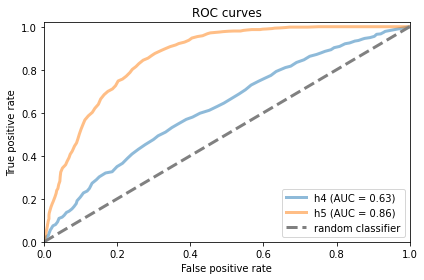

In [ ]:
def compute_xy_roc_curve(y_true, y_pred):
    '''
    Function for obtaining the ROC curve
    the axes are: FPR and TPR. 
    FPR = FP/(FP+TN)
    TPR = TP/(TP+FN)
    '''
    n_positives = sum(y_true == 1) # TP+FN
    n_negatives = sum(y_true == 0) # FP+TN

    if n_positives == 0 or n_negatives == 0:
        raise Exception
    
    # sorting the samples according to the ranking, in descendent order
    index = np.argsort(y_pred)[::-1]
    sorted_y_true = y_true[index]
    sorted_y_pred = y_pred[index]
    
    # initialization
    fpr, tpr = [], []
    tp, fp = 0, 0 # situation at the beginning, i.e. when every
                  # sample is predicted as negative
    previous_y_p = None # this is the threshold
    
    # calculating the fpr and tpr per each different threshold
    for y_t, y_p in zip(sorted_y_true, sorted_y_pred):
        if previous_y_p is None or y_p != previous_y_p: 
            # if there is a new value for the confidence, we update the
            # threshold and we calculate tpr and fpr. 
            # If we have the same confidency value as before, we do NOT
            # update the threshold, we do NOT calculate the fpr and tpr, 
            # but we continue to increase the number of fp/tn (outside
            # this if.
            fpr.append(fp / n_negatives)
            tpr.append(tp / n_positives)
            previous_y_p = y_p
            
        if y_t == 1:
            tp += 1
        else:
            fp += 1
            
    # we append the last value       
    fpr.append(fp / n_negatives)
    tpr.append(tp / n_positives)
    return fpr, tpr


def compute_auc(roc_fpr, roc_tpr):
    '''
    Function for calculating the area under the ROC curve
    '''
    previous_fpr, previous_tpr = 0.0, 0.0
    auc = 0.0
    for fpr, tpr in zip(roc_fpr, roc_tpr):
        auc += ((fpr - previous_fpr) * (tpr + previous_tpr)) / 2.0
        previous_fpr, previous_tpr = fpr, tpr
    
    
    return auc


import matplotlib.pyplot as plt
%matplotlib inline

# This will plot several ROC curves
# thus, list_of_x_list contains a list of x values for every classifier
# thus, list_of_y_list contains a list of y values for every classifier
# thus, labels contains a descriptive label for every classifier
def plot_roc_curves(list_of_x_lists, list_of_y_lists, labels):
    '''
    Function for plotting the ROC curve
    '''
    fig = plt.figure()
    for x, y, label in zip(list_of_x_lists, list_of_y_lists, labels):
        plt.plot(x, y, label=label, linewidth=3, alpha=0.5)
    
    
    plt.plot([0, 1], [0, 1], label = 'random classifier', color = 'grey', linestyle = 'dashed', linewidth = 3)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.02])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curves')
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()
    
    
############################# MAIN ################################
# Reading the data
h4_yTrue, h4_yPred = read_classifier('h4_evaluation.txt')
h5_yTrue, h5_yPred = read_classifier('h5_evaluation.txt')

# Compute the roc curve
h4_fpr, h4_tpr = compute_xy_roc_curve(h4_yTrue, h4_yPred)
h5_fpr, h5_tpr = compute_xy_roc_curve(h5_yTrue, h5_yPred)

# Calculate the area under the roc curve (AUC)
h4_auc = compute_auc(h4_fpr, h4_tpr)
h5_auc = compute_auc(h5_fpr, h5_tpr)

# printing the AUC of the classifiers & the ROC curves
print('AUC of h4: ' + str(np.round(h4_auc, 2)))
print('AUC of h5: ' + str(np.round(h5_auc, 2)))
plot_roc_curves([h4_fpr, h5_fpr], [h4_tpr, h5_tpr], ['h4 (AUC = %.2f)' % h4_auc, 'h5 (AUC = %.2f)' % h5_auc])

#### Question

Would you use only the ROC curve for evaluating the perfomance of h1, h2, and h3 on the dataset from exercise 2, i.e. the one having class imbalance?

No, in a situation of class imbalance, like it's often the case in biomedical applications, it's better to evaluate classifiers by also taking into account the precision-recall plot rather than the ROC curve only. In fact, the ROC curve might be misleading in case of class imbalance. 

AUC: 0.75


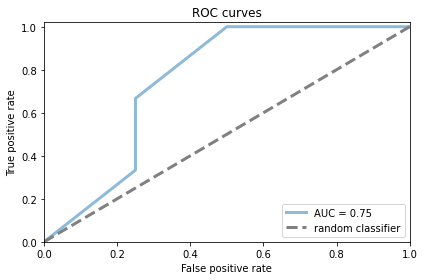

In [ ]:
####### Checking the example #######
y_real = np.array([0, 1, 0, 1, 1, 0, 0])
confidence = np.array([0.1, 0.6, 0.6, 0.5, 0.4, 0.4, 0.1])

# Compute the roc curve
fpr_ex, tpr_ex = compute_xy_roc_curve(y_real, confidence)

# Calculate the area under the roc curve (AUC)
auc = compute_auc(fpr_ex, tpr_ex)

print('AUC: ' + str(np.round(auc, 2)))

plot_roc_curves([fpr_ex], [tpr_ex], ['AUC = %.2f' % auc])

In [ ]:
print('(FPR,\tTPR)')
for x, y in zip(fpr_ex, tpr_ex):
    print('(' + str(np.round(x, 2)) + ',\t' +  str(np.round(y, 2)) + ')')

(FPR,	TPR)
(0.0,	0.0)
(0.25,	0.33)
(0.25,	0.67)
(0.5,	1.0)
(1.0,	1.0)
